<a href="https://colab.research.google.com/github/romenger1/Data_Acquisition/blob/main/Rede_Neural_Convolucional_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.16.1

In [70]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib

In [71]:
np.__version__,tf.__version__, keras.__version__, matplotlib.__version__,

('2.0.2', '2.18.0', '3.8.0', '3.10.0')

In [72]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [73]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

In [74]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

Text(0.5, 1.0, 'classe 4')

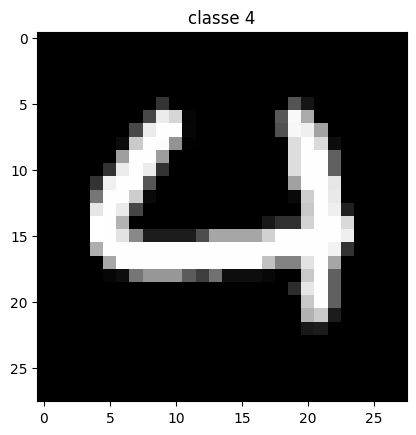

In [75]:
plt.imshow(X_treinamento[60], cmap= 'gray')
plt.title('classe ' + str(y_treinamento[60]))

In [76]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1)

In [77]:
X_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1)

In [78]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [79]:
X_treinamento = X_treinamento.astype('float32')

In [80]:
X_teste = X_teste.astype('float32')

In [81]:
X_treinamento /= 255
X_teste /= 255

In [82]:
X_treinamento.max(), X_treinamento.min()

(np.float32(1.0), np.float32(0.0))

In [83]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [84]:
y_treinamento = np_utils.to_categorical(y_treinamento, num_classes= 10)
y_teste = np_utils.to_categorical(y_teste, num_classes= 10)

In [85]:
y_treinamento.shape

(60000, 10)

In [86]:
y_treinamento[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [89]:
rede_neural = Sequential()
rede_neural.add(InputLayer(shape=(28, 28, 1)))

rede_neural.add(Conv2D(filters= 32, kernel_size= (3, 3), activation = 'relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size= (2, 2)))

rede_neural.add(Conv2D(filters= 32, kernel_size= (3, 3), activation = 'relu'))
rede_neural.add(BatchNormalization())
rede_neural.add(MaxPooling2D(pool_size= (2, 2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units= 128, activation= 'relu'))
rede_neural.add(Dropout(0.2))
rede_neural.add(Dense(units= 128, activation= 'relu'))
rede_neural.add(Dropout(0.2))

rede_neural.add(Dense(units= 10, activation= 'softmax'))

In [90]:
rede_neural.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 11, 11, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [91]:
rede_neural.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [92]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size= 128, epochs = 5, validation_data = (X_teste, y_teste))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 157ms/step - accuracy: 0.8473 - loss: 0.4901 - val_accuracy: 0.9629 - val_loss: 0.1274
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 155ms/step - accuracy: 0.9778 - loss: 0.0750 - val_accuracy: 0.9869 - val_loss: 0.0415
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 160ms/step - accuracy: 0.9848 - loss: 0.0493 - val_accuracy: 0.9888 - val_loss: 0.0353
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 154ms/step - accuracy: 0.9892 - loss: 0.0366 - val_accuracy: 0.9873 - val_loss: 0.0417
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 148ms/step - accuracy: 0.9907 - loss: 0.0288 - val_accuracy: 0.9891 - val_loss: 0.0366


In [93]:
resultado = rede_neural.evaluate(X_teste, y_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9847 - loss: 0.0497


In [94]:
resultado

[0.03663836047053337, 0.9890999794006348]